In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import pickle
from helper.pickle_utils import load_pickle, save_pickle
from helper.eda import dataframe_info

import matplotlib.pyplot as plt
import seaborn as sns

## Load Train Test Set

In [4]:
df_train=pd.read_json('./dataset/df_train.tokenized.json')
df_test=pd.read_json('./dataset/df_test.tokenized.json')
dataframe_info(df_train)
dataframe_info(df_test)

INFO : DataFrame has 6989 rows and 3 columns
INFO : Column Names are Index(['tweet_text', 'topic', 'label'], dtype='object')
INFO : DataFrame has 2330 rows and 3 columns
INFO : Column Names are Index(['tweet_text', 'topic', 'label'], dtype='object')


In [19]:
df_train.head(3)

,tweet_text,topic,label
3035,cdc mer infect prevent control,prevention,2
899,ebola fg withdraw approv nano silva treatment,not_related_or_irrelevant,7
10382,coronaviru death toll us rise peopl covid covi...,deaths_reports,4


In [20]:
df_test.head(3)

,tweet_text,topic,label
10198,region breakdown covid case ghana greater accr...,affected_people,5
8027,eric holder coronaviru opportun perman chang a...,not_related_or_irrelevant,7
4628,coronaviru updat number th march look latest n...,other_useful_information,6


## Load Vectorizer

In [5]:
vectorizer=load_pickle('./model/tfidf_vectorizer.pkl')
print(f'INFO : Successfully loaded {type(vectorizer)}')

Loading Pickled object from ./model/tfidf_vectorizer.pkl
INFO : Successfully loaded <class 'sklearn.feature_extraction.text.TfidfVectorizer'>


# Model Training

Grid Search Cross-Validation

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [18]:
schemas=[
    {
        'model_name': 'Logistic_Regression',
        'model_path': './model/model_Logistic_Regression.pkl',
        'plot_path' : './plot/confmat_Logistic_Regression.png',
        'model_obj' : LogisticRegression,
        'vec_obj' : vectorizer,
        'grid_params': {
            'clf__C': np.logspace(-1,2,5),
            'clf__class_weight': ['balanced'],
        },
    },
    {
        'model_name': 'Decision Tree',
        'model_path': './model/model_Decision_Tree',
        'plot_path' : './plot/confmat_Decision_Tree.png',
        'model_obj' : DecisionTreeClassifier,
        'vec_obj' : vectorizer,
        'grid_params': {
            "clf__max_depth": range(10,30,10),
            "clf__min_samples_leaf": [2, 4, 8],
            'clf__class_weight': ['balanced']
        },
    },
    {
        'model_name': 'Random Forest',
        'model_path': './model/model_Random_Forest.pkl',
        'plot_path' : './plot/confmat_Random_Forest.png',
        'model_obj' : RandomForestClassifier,
        'vec_obj' : vectorizer,
        'grid_params': {
            "clf__n_estimators": [10, 40],
            "clf__max_depth" : [10, 15],
            'clf__class_weight': ['balanced']
        },
    },
    {
        'model_name': 'SVC',
        'model_path': './model/model_Support_Vector.pkl',
        'plot_path' : './plot/confmat_Support_Vector.png',
        'model_obj' : LinearSVC,
        'vec_obj' : vectorizer,
        'grid_params': {
            'clf__C': np.logspace(-3,1,5),
            'clf__class_weight': ['balanced']
        },
    }
]

In [45]:
np.logspace(-3,1,5)

(array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),)

In [9]:
from helper.model import train_model_CV

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

=*=*=*=*=*=* Training for Logistic_Regression =*=*=*=*=*=*
Best Parameters: {'clf__C': 3.1622776601683795, 'clf__class_weight': 'balanced'}
Accuracy :68.4%
INFO : Saved Image of Confusion Matrix at  ./plot/confmat_Logistic_Regression.png


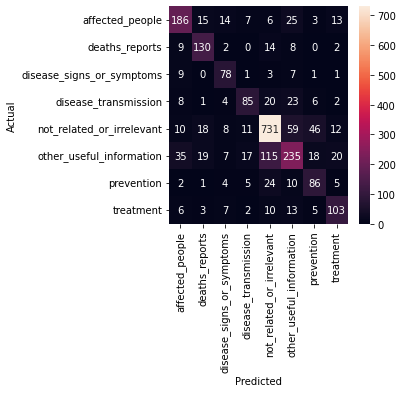

Logistic_Regression, Score : 0.684
Pickled object to ./model/model_Logistic_Regression.pkl
INFO : Model saved to ./model/model_Logistic_Regression.pkl
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
=*=*=*=*=*=* Training for Decision Tree =*=*=*=*=*=*
Best Parameters: {'clf__class_weight': 'balanced', 'clf__max_depth': 10, 'clf__min_samples_leaf': 4}
Accuracy :61.4%
INFO : Saved Image of Confusion Matrix at  ./plot/confmat_Decision_Tree.png


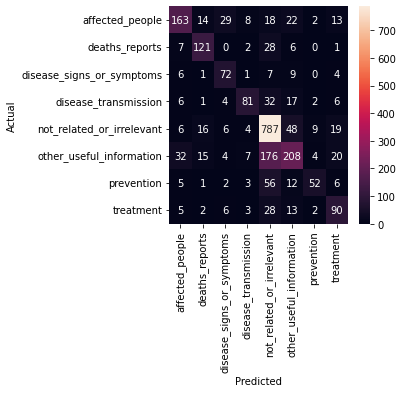

Decision Tree, Score : 0.614
Pickled object to ./model/model_Decision_Tree
INFO : Model saved to ./model/model_Decision_Tree
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
=*=*=*=*=*=* Training for Random Forest =*=*=*=*=*=*


/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

Best Parameters: {'clf__class_weight': 'balanced', 'clf__max_depth': 15, 'clf__n_estimators': 40}
Accuracy :66.4%
INFO : Saved Image of Confusion Matrix at  ./plot/confmat_Random_Forest.png


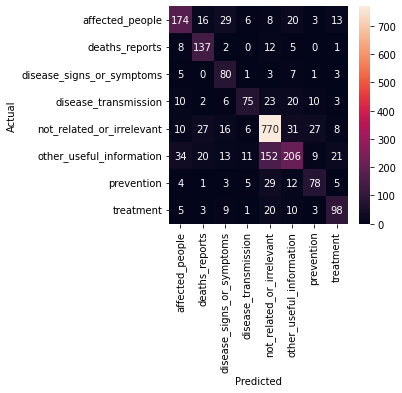

Random Forest, Score : 0.664
Pickled object to ./model/model_Random_Forest.pkl
INFO : Model saved to ./model/model_Random_Forest.pkl
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
=*=*=*=*=*=* Training for SVC =*=*=*=*=*=*
Best Parameters: {'clf__C': 0.1, 'clf__class_weight': 'balanced'}
Accuracy :68.9%
INFO : Saved Image of Confusion Matrix at  ./plot/confmat_Support_Vector.png


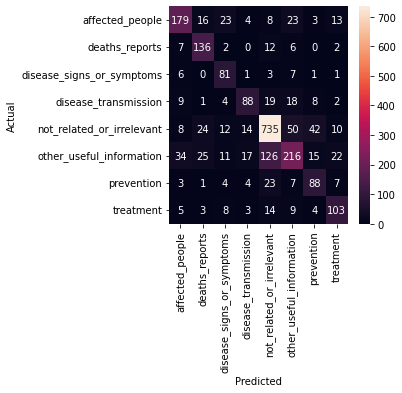

SVC, Score : 0.689
Pickled object to ./model/model_Support_Vector.pkl
INFO : Model saved to ./model/model_Support_Vector.pkl
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [19]:
all_results=[]

for schema in schemas:
    best_model, result = train_model_CV(schema, df_train, df_test, save_model=True)
    all_results.append(result)

## Save Results

In [21]:
df_result=pd.DataFrame(all_results).sort_values('Score').reset_index(drop=True)
df_result.to_json('./model/df_result.json', default_handler=str)
df_result.head()

,Model_Name,Best_Params,Confusion_Matrix,Score
0,Decision Tree,"{'clf__class_weight': 'balanced', 'clf__max_de...","([[163, 14, 29, 8, 18, 22, 2, 13], [7, 121, 0,...",0.614022
1,Random Forest,"{'clf__class_weight': 'balanced', 'clf__max_de...","([[174, 16, 29, 6, 8, 20, 3, 13], [8, 137, 2, ...",0.663744
2,Logistic_Regression,"{'clf__C': 3.1622776601683795, 'clf__class_wei...","([[186, 15, 14, 7, 6, 25, 3, 13], [9, 130, 2, ...",0.683733
3,SVC,"{'clf__C': 0.1, 'clf__class_weight': 'balanced'}","([[179, 16, 23, 4, 8, 23, 3, 13], [7, 136, 2, ...",0.688579


/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w